In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [2]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
bos.columns = boston.feature_names

In [4]:
bos['price'] = boston.target

In [5]:
bos.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [1]:
import matplotlib.pyplot as plt


In [7]:
from sklearn import cross_validation
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X[:,:-1], X[:,-1], test_size = 0.2, random_state = 42)

C:\Users\siddam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
X = bos.drop('price', axis=1)
Y = bos['price']

In [11]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [15]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
lr.coef_

array([-1.12463481e-01,  3.00810168e-02,  4.07309919e-02,  2.78676719e+00,
       -1.72406347e+01,  4.43248784e+00, -6.23998173e-03, -1.44848504e+00,
        2.62113793e-01, -1.06390978e-02, -9.16398679e-01,  1.24516469e-02,
       -5.09349120e-01])

In [17]:
lr.intercept_

30.288948339369448

In [18]:
Y_Pred = lr.predict(X_test)

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

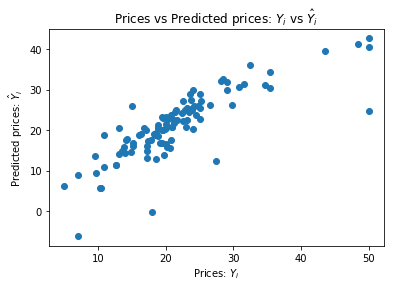

In [20]:
plt.scatter(Y_test, Y_Pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [21]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_Pred)

In [22]:
mse

24.311426929693344

In [23]:
lr.score(X_test, Y_test)

0.6684825753971606

In [26]:
r2 = sklearn.metrics.r2_score(Y_test, Y_Pred)
r2

0.6684825753971606